# Variogram for Geologic Tops

In this notebook we will read in a small top dataset, understand how the data is distributed both spatially and depth-wise. next we will choose the parameters for our semivariogram and then use `geostatspy` to calculate the isotropic, 030, and 060 directional experimental semivariograms.

Make sure you have `geostatspy` installed in your virtual environment with the cell below

In [ ]:
! pip install geostatspy

Then go ahead and import `geostatspy`, `matplotlib`, `pandas`, and `seaborn`

In [1]:
import geostatspy.geostats as geostats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

%matplotlib inline

Now use pandas to read in the `csv` file that contains the depth to the top of the formation

In [2]:
data = pd.read_csv(r"top_depth.csv")

Use the `.describe()` method to get the descriptive statistics on the location and depth of each data point. We want to use the statistics to guide our choice in parameter selection

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
depth (ft),808.0,7260.137005,2728.745904,736.50000,5415.35000,7350.35000,9058.300000,16256.50000
longitude,888.0,-108.154491,0.295066,-108.83045,-108.40530,-108.12416,-107.917205,-107.47332
latitude,888.0,41.602112,0.318993,41.00538,41.32927,41.64078,41.846212,42.27089


Set the parameters to variables. Here we are most concerned with the `xlag`, `xltol`, `azm`, and `atol` variables. Those are the lag distance, lag tolerance, azimuth, and azimuth tolerance respectively. Change these to see how it impacts the experimental variograms

In [4]:
tmin = 0.0
tmax = 100_000.0
xlag = 0.01
xltol = 0.005
nlag = 100
azm = 0.0
atol = 90
bandwh = 0.005
isill = 1

To calculate the semivariogram we call `geostats.gamv()` and imput our variables according to the documentation. Here I calculate the isotropic experimental semivariogram, along with directional semivariograms in the 030 and 060 directions.

In [5]:
isotropic_lag, isotropic_vario, isotropic_npp = geostats.gamv(
    data,
    "longitude",
    "latitude",
    "depth (ft)",
    tmin,
    tmax,
    xlag,
    xltol,
    nlag,
    azm,
    atol,
    bandwh,
    isill,
)

zero_lag, zero_vario, zero_npp = geostats.gamv(
    data,
    "longitude",
    "latitude",
    "depth (ft)",
    tmin,
    tmax,
    xlag,
    xltol,
    nlag,
    30.0,
    22,
    bandwh,
    isill,
)

ninety_lag, ninety_vario, ninety_npp = geostats.gamv(
    data,
    "longitude",
    "latitude",
    "depth (ft)",
    tmin,
    tmax,
    xlag,
    xltol,
    nlag,
    60,
    22,
    bandwh,
    isill,
)

Lastly, let's go ahead and plot up the semivariogram along with the lag distance to compare them. That was quick and painless! Now comes the hard part. Take some time and think about what the difference between these three semivariograms means from a geologic perspective. Think about the following:
* Is the data isotropic? 
* Is there some directional component in the dataset?
* What does the range and sill of the different semivariograms tell you?

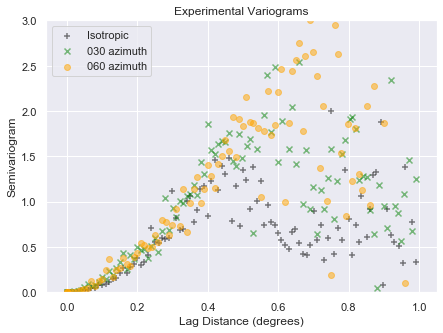

In [6]:
plt.figure(figsize=(7, 5))
plt.scatter(
    isotropic_lag,
    isotropic_vario,
    c="black",
    marker="+",
    alpha=0.5,
    label="Isotropic",
)
plt.scatter(
    zero_lag, zero_vario, c="green", marker="x", alpha=0.5, label="030 azimuth"
)
plt.scatter(
    ninety_lag, ninety_vario, c="orange", alpha=0.5, label="060 azimuth"
)
plt.ylim(0, 3)
plt.xlabel("Lag Distance (degrees)")
plt.ylabel("Semivariogram")
plt.title("Experimental Variograms")
plt.legend()

This notebook is licensed as CC-BY, use and share to your hearts content.